### Unicodes

In [3]:
!wget http://www.unicode.org/Public/UNIDATA/Blocks.txt -O unicodes.txt

--2023-08-21 21:08:14--  http://www.unicode.org/Public/UNIDATA/Blocks.txt
Resolving www.unicode.org (www.unicode.org)... 64.182.27.164
Connecting to www.unicode.org (www.unicode.org)|64.182.27.164|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10951 (11K) [text/plain]
Saving to: ‘unicodes.txt’

unicodes.txt        100%[===================>]  10.69K  --.-KB/s    in 0.001s  

2023-08-21 21:08:15 (19.0 MB/s) - ‘unicodes.txt’ saved [10951/10951]



In [4]:
import re
from pprint import pprint

pattern = re.compile("\n([A-Z0-9]+)..([A-Z0-9]+); (.*)\n")
with open("unicodes.txt", 'r') as f:
    unicode_list = pattern.findall(f.read())
    pprint(unicode_list)

[('0000', '007F', 'Basic Latin'),
 ('0100', '017F', 'Latin Extended-A'),
 ('0250', '02AF', 'IPA Extensions'),
 ('0300', '036F', 'Combining Diacritical Marks'),
 ('0400', '04FF', 'Cyrillic'),
 ('0530', '058F', 'Armenian'),
 ('0600', '06FF', 'Arabic'),
 ('0750', '077F', 'Arabic Supplement'),
 ('07C0', '07FF', 'NKo'),
 ('0840', '085F', 'Mandaic'),
 ('0870', '089F', 'Arabic Extended-B'),
 ('0900', '097F', 'Devanagari'),
 ('0A00', '0A7F', 'Gurmukhi'),
 ('0B00', '0B7F', 'Oriya'),
 ('0C00', '0C7F', 'Telugu'),
 ('0D00', '0D7F', 'Malayalam'),
 ('0E00', '0E7F', 'Thai'),
 ('0F00', '0FFF', 'Tibetan'),
 ('10A0', '10FF', 'Georgian'),
 ('1200', '137F', 'Ethiopic'),
 ('13A0', '13FF', 'Cherokee'),
 ('1680', '169F', 'Ogham'),
 ('1700', '171F', 'Tagalog'),
 ('1740', '175F', 'Buhid'),
 ('1780', '17FF', 'Khmer'),
 ('18B0', '18FF', 'Unified Canadian Aboriginal Syllabics Extended'),
 ('1950', '197F', 'Tai Le'),
 ('19E0', '19FF', 'Khmer Symbols'),
 ('1A20', '1AAF', 'Tai Tham'),
 ('1B00', '1B7F', 'Balinese'),


In [5]:
!rm unicodes.txt

In [6]:
from collections import OrderedDict

result_dict = OrderedDict({
    name: (int(ci, 16), int(cf, 16)) for ci, cf, name in unicode_list
})
pprint(result_dict)

OrderedDict([('Basic Latin', (0, 127)),
             ('Latin Extended-A', (256, 383)),
             ('IPA Extensions', (592, 687)),
             ('Combining Diacritical Marks', (768, 879)),
             ('Cyrillic', (1024, 1279)),
             ('Armenian', (1328, 1423)),
             ('Arabic', (1536, 1791)),
             ('Arabic Supplement', (1872, 1919)),
             ('NKo', (1984, 2047)),
             ('Mandaic', (2112, 2143)),
             ('Arabic Extended-B', (2160, 2207)),
             ('Devanagari', (2304, 2431)),
             ('Gurmukhi', (2560, 2687)),
             ('Oriya', (2816, 2943)),
             ('Telugu', (3072, 3199)),
             ('Malayalam', (3328, 3455)),
             ('Thai', (3584, 3711)),
             ('Tibetan', (3840, 4095)),
             ('Georgian', (4256, 4351)),
             ('Ethiopic', (4608, 4991)),
             ('Cherokee', (5024, 5119)),
             ('Ogham', (5760, 5791)),
             ('Tagalog', (5888, 5919)),
             ('Buhid', (5952, 59

In [36]:
with open("kain/configs.py", 'a') as f:
    f.write("\n")
    f.write("UNICODES = OrderedDict({\n")
    for name, (ci, cf) in result_dict.items():
        f.write(f"\t'{name}': ({ci}, {cf}),\n")
    f.write("})\n")

In [7]:
LANG = 'Basic Latin'
CPL = 20

for name, (ci, cf) in result_dict.items():
    if name==LANG:
        s = [chr(c) for c in range(ci, cf+1, 1)]
        pprint(s, compact=True)
        break
else:
    print("Language not found.")

['\x00', '\x01', '\x02', '\x03', '\x04', '\x05', '\x06', '\x07', '\x08', '\t',
 '\n', '\x0b', '\x0c', '\r', '\x0e', '\x0f', '\x10', '\x11', '\x12', '\x13',
 '\x14', '\x15', '\x16', '\x17', '\x18', '\x19', '\x1a', '\x1b', '\x1c', '\x1d',
 '\x1e', '\x1f', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+',
 ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';',
 '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[',
 '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
 '{', '|', '}', '~', '\x7f']


In [8]:
LANGS = ['Basic Latin', 'Thai']
char_list = []
for name, (ci, cf) in result_dict.items():
    if name in LANGS:
        char_list += [chr(c) for c in range(ci, cf+1, 1)]
pprint(char_list, compact=True)

encoding_dict = {}
decoding_dict = {}
for i, c in enumerate(char_list):
    encoding_dict[c] = i
    decoding_dict[i] = c

['\x00', '\x01', '\x02', '\x03', '\x04', '\x05', '\x06', '\x07', '\x08', '\t',
 '\n', '\x0b', '\x0c', '\r', '\x0e', '\x0f', '\x10', '\x11', '\x12', '\x13',
 '\x14', '\x15', '\x16', '\x17', '\x18', '\x19', '\x1a', '\x1b', '\x1c', '\x1d',
 '\x1e', '\x1f', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+',
 ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';',
 '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[',
 '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
 '{', '|', '}', '~', '\x7f', '\u0e00', 'ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ',
 'ฉ', 'ช', 'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท', 'ธ',
 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ฤ', 'ล', 'ฦ', 'ว', 'ศ',
 'ษ', 'ส', 'ห', 'ฬ', 'อ', 'ฮ', 'ฯ', 'ะ', 'ั'

In [9]:
pprint(encoding_dict)

{'\x00': 0,
 '\x01': 1,
 '\x02': 2,
 '\x03': 3,
 '\x04': 4,
 '\x05': 5,
 '\x06': 6,
 '\x07': 7,
 '\x08': 8,
 '\t': 9,
 '\n': 10,
 '\x0b': 11,
 '\x0c': 12,
 '\r': 13,
 '\x0e': 14,
 '\x0f': 15,
 '\x10': 16,
 '\x11': 17,
 '\x12': 18,
 '\x13': 19,
 '\x14': 20,
 '\x15': 21,
 '\x16': 22,
 '\x17': 23,
 '\x18': 24,
 '\x19': 25,
 '\x1a': 26,
 '\x1b': 27,
 '\x1c': 28,
 '\x1d': 29,
 '\x1e': 30,
 '\x1f': 31,
 ' ': 32,
 '!': 33,
 '"': 34,
 '#': 35,
 '$': 36,
 '%': 37,
 '&': 38,
 "'": 39,
 '(': 40,
 ')': 41,
 '*': 42,
 '+': 43,
 ',': 44,
 '-': 45,
 '.': 46,
 '/': 47,
 '0': 48,
 '1': 49,
 '2': 50,
 '3': 51,
 '4': 52,
 '5': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57,
 ':': 58,
 ';': 59,
 '<': 60,
 '=': 61,
 '>': 62,
 '?': 63,
 '@': 64,
 'A': 65,
 'B': 66,
 'C': 67,
 'D': 68,
 'E': 69,
 'F': 70,
 'G': 71,
 'H': 72,
 'I': 73,
 'J': 74,
 'K': 75,
 'L': 76,
 'M': 77,
 'N': 78,
 'O': 79,
 'P': 80,
 'Q': 81,
 'R': 82,
 'S': 83,
 'T': 84,
 'U': 85,
 'V': 86,
 'W': 87,
 'X': 88,
 'Y': 89,
 'Z': 90,
 '[': 91,


In [10]:
pprint(decoding_dict)

{0: '\x00',
 1: '\x01',
 2: '\x02',
 3: '\x03',
 4: '\x04',
 5: '\x05',
 6: '\x06',
 7: '\x07',
 8: '\x08',
 9: '\t',
 10: '\n',
 11: '\x0b',
 12: '\x0c',
 13: '\r',
 14: '\x0e',
 15: '\x0f',
 16: '\x10',
 17: '\x11',
 18: '\x12',
 19: '\x13',
 20: '\x14',
 21: '\x15',
 22: '\x16',
 23: '\x17',
 24: '\x18',
 25: '\x19',
 26: '\x1a',
 27: '\x1b',
 28: '\x1c',
 29: '\x1d',
 30: '\x1e',
 31: '\x1f',
 32: ' ',
 33: '!',
 34: '"',
 35: '#',
 36: '$',
 37: '%',
 38: '&',
 39: "'",
 40: '(',
 41: ')',
 42: '*',
 43: '+',
 44: ',',
 45: '-',
 46: '.',
 47: '/',
 48: '0',
 49: '1',
 50: '2',
 51: '3',
 52: '4',
 53: '5',
 54: '6',
 55: '7',
 56: '8',
 57: '9',
 58: ':',
 59: ';',
 60: '<',
 61: '=',
 62: '>',
 63: '?',
 64: '@',
 65: 'A',
 66: 'B',
 67: 'C',
 68: 'D',
 69: 'E',
 70: 'F',
 71: 'G',
 72: 'H',
 73: 'I',
 74: 'J',
 75: 'K',
 76: 'L',
 77: 'M',
 78: 'N',
 79: 'O',
 80: 'P',
 81: 'Q',
 82: 'R',
 83: 'S',
 84: 'T',
 85: 'U',
 86: 'V',
 87: 'W',
 88: 'X',
 89: 'Y',
 90: 'Z',
 91: '[',


### Dimensions

In [11]:
# Text
from kain.senses import TextEncoder, TextDecoder
import torch
from pprint import pprint

enet = TextEncoder(
    langs=['Basic Latin'],
    num_vectors=196,
    num_blocks=3,
    num_features=192,
    num_heads=2,
    num_ff_dim=256,
    dropout_rate=0.1
)
dnet = TextDecoder(
    langs=['Basic Latin'],
    num_vectors=196,
    num_blocks=3,
    num_features=192,
    num_heads=2,
    num_ff_dim=256,
    dropout_rate=0.1
)

x = ["Hi. I am Kain.", "ad", "sdfg", "123"]
batch_size = len(x)
print(x, end="\n\n")
x = enet.predict(x)
print(x.tensor.shape, torch.sum(x.tensor**2)/batch_size, end="\n\n")
x = dnet.predict(x, x)
pprint(x)

['Hi. I am Kain.', 'ad', 'sdfg', '123']

torch.Size([4, 1, 192]) tensor(1.)

['50-^\x1bgB \x7fz\x1c'
 ")\x08\x18\x7fS\x18\x7f_\x0842q\x1b\x1bC6\x0177F)BZ\x7f\x17Ze:o'o\x14\x0b"
 ')D\x0e6\x7f\x16\x1f\t<q)4\x0b'
 '\x022;Mzh\x1f\x14h5\\=\x1f8g\x7f',
 "6)'K\x1bJ2\x13\x7fg\x0b"
 'W4p\x1b\x06\x7fZ#-0a\x1d'
 '\x18r1>-tT\x1bA9*\x7fOBy\x19\x1d'
 's\x185\x19/\x12+Y\x1e'
 '=\x05)i\x1f%A>*B%)\x7f\x17Lu\x7f\x01\x7f4\x1d'
 '\\!\x7f(',
 '1=\x0b'
 'Gb#>\x7fV\x046.\x7f4C\x7ff(Ah\x0c'
 "+5<-3[C\x18\x08<Z<M\x7fIm?A\x16:\x7f'A5F\x18C2\x7fZ\x1a<w4\x1d"
 '\x19\x1fl\x1d'
 '\x1f<`\x00\x1e'
 'X!m\x1e',
 '/*-d\x0c'
 '7\x7f"\x1c'
 '\x7fv\x16,:1}0\x13\x7f^\x7f81\x7f\x14.nt\x1e'
 "*4\x0f'\r"
 '\x18U2WxKr*3j\x13N;0!\x13+@\x19*B+v\x1d'
 '\x1c'
 '0=\x1c'
 's"wCI2":)\x1f!']


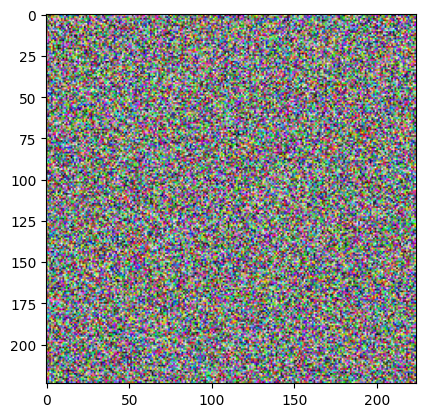

torch.Size([4, 1, 192]) tensor(1.0000)



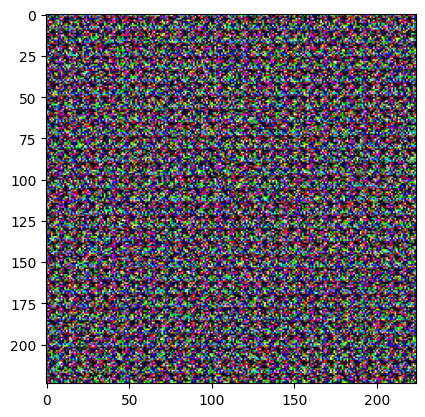

In [12]:
# Image
from kain.senses import ImageEncoder, ImageDecoder
import torch
import numpy as np
from matplotlib import pyplot as plt

enet = ImageEncoder(
    side_lengths=(224, 224),
    num_patches=(28, 28),
    num_channels=3,
    num_blocks=3,
    num_heads=2, 
    num_ff_dim=1000,
    dropout_rate=0.1
)
dnet = ImageDecoder(
    side_lengths=(224, 224),
    num_patches=(28, 28),
    num_channels=3,
    num_blocks=3,
    num_heads=2, 
    num_ff_dim=1000,
    dropout_rate=0.1
)

x = np.random.rand(4, 224, 224, 3)
batch_size = len(x)
plt.imshow(x[0])
plt.show()
x = enet.predict(x)
print(x.tensor.shape, torch.sum(x.tensor**2)/batch_size, end="\n\n")
x = dnet.predict(x, x)
plt.imshow(x[0])
plt.show()

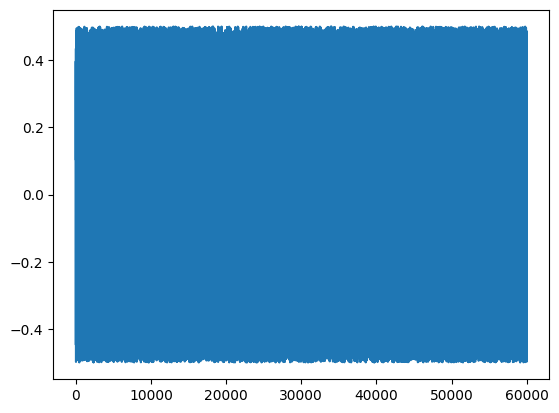

torch.Size([4, 1, 192]) tensor(1.)



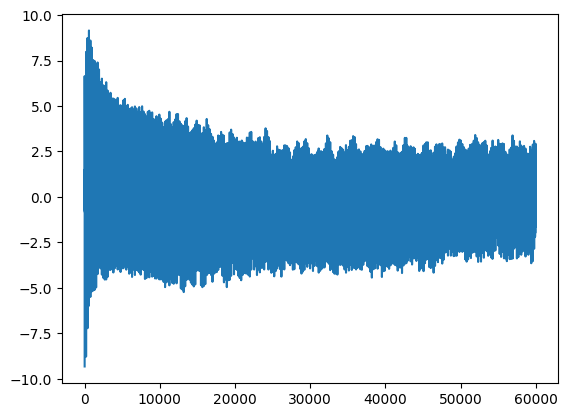

In [13]:
# Voice
from kain.senses import VoiceEncoder, VoiceDecoder
import torch
import numpy as np
from matplotlib import pyplot as plt

sampling_rate = 12000
max_seconds = 5
max_length = sampling_rate * max_seconds

enet = VoiceEncoder(
    max_length=max_length,
    num_blocks=3,
    num_features=192, 
    num_heads=2, 
    num_ff_dim=1000,
    dropout_rate=0.1
)
dnet = VoiceDecoder(
    max_length=max_length,
    num_blocks=3,
    num_features=192, 
    num_heads=2, 
    num_ff_dim=1000,
    dropout_rate=0.1
)

x = np.random.rand(4, max_length)
batch_size = len(x)
plt.plot(x[0]-x[0].mean(axis=-1, keepdims=True)),
plt.show()
x = enet.predict(x)
print(x.tensor.shape, torch.sum(x.tensor**2)/batch_size, end="\n\n")
x = dnet.predict(x, x)
plt.plot(x[0]-x[0].mean(axis=-1, keepdims=True))
plt.show()